In [66]:
import itertools 
import matplotlib 
import matplotlib.style 
import numpy as np 
import sys 
import random 
import math
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
# Defining action set

p99 = 10.678
p50 = 8.980137
p1 = 7.971982

actions_pre_low = np.linspace(p1, p50, num=10)
actions_low = actions_pre_low.tolist()
actions_pre_high = np.linspace(p50, p99, num=10)
actions_high = actions_pre_high.tolist()

actions = actions_low + actions_high
actions=list(set(actions))

for i in range(len(actions)):
    actions[i]=round(actions[i],6)
    
print(actions)

# Pre-prices (data)

Bud_Pre = pd.read_stata('Bud_Pre.dta')
Coors_Pre = pd.read_stata('Coors_Pre.dta')
Miller_Pre = pd.read_stata('Miller_Pre.dta')

Bud_Pre_Prices=[]
Coors_Pre_Prices=[]
Miller_Pre_Prices=[]

for i, j in Bud_Pre.iterrows():
    Bud_Pre_Prices.append(j[0])
    
for i, j in Coors_Pre.iterrows():
    Coors_Pre_Prices.append(j[0])
    
for i, j in Miller_Pre.iterrows():
    Miller_Pre_Prices.append(j[0])
    
# Pre-prices (closest to action choice)

Bud_Prices_Pre=[]

for i in range(len(Bud_Pre_Prices)):
    k = min(actions, key=lambda x:abs(x-Bud_Pre_Prices[i]))
    Bud_Prices_Pre.append(k)

Coors_Prices_Pre=[]

for i in range(len(Coors_Pre_Prices)):
    k = min(actions, key=lambda x:abs(x-Coors_Pre_Prices[i]))
    Coors_Prices_Pre.append(k)
    
Miller_Prices_Pre=[]

for i in range(len(Miller_Pre_Prices)):
    k = min(actions, key=lambda x:abs(x-Miller_Pre_Prices[i]))
    Miller_Prices_Pre.append(k)

[7.971982, 8.083999, 8.196016, 8.420051, 8.308034, 8.532068, 8.644085, 8.756103, 8.86812, 8.980137, 9.168788, 9.35744, 10.112046, 9.546091, 9.734743, 9.923394, 10.300697, 10.489349, 10.678]


In [68]:
# Post-prices (data)

Bud_Post = pd.read_stata('Bud_Post.dta')
Coors_Post = pd.read_stata('Coors_Post.dta')
Miller_Post = pd.read_stata('Miller_Post.dta')

Bud_Post_Prices=[]
Coors_Post_Prices=[]
Miller_Post_Prices=[]

for i, j in Bud_Post.iterrows():
    Bud_Post_Prices.append(j[1])
    
for i, j in Coors_Post.iterrows():
    Coors_Post_Prices.append(j[1])
    
for i, j in Miller_Post.iterrows():
    Miller_Post_Prices.append(j[1])
    
# Post-prices (closest to action choice)

Bud_Prices_Post=[]

for i in range(len(Bud_Post_Prices)-1):
    k = min(actions, key=lambda x:abs(x-Bud_Post_Prices[i]))
    Bud_Prices_Post.append(k)

Coors_Prices_Post=[]

for i in range(len(Coors_Post_Prices)-1):
    k = min(actions, key=lambda x:abs(x-Coors_Post_Prices[i]))
    Coors_Prices_Post.append(k)
    
Miller_Prices_Post=[]

for i in range(len(Miller_Post_Prices)-1):
    k = min(actions, key=lambda x:abs(x-Miller_Post_Prices[i]))
    Miller_Prices_Post.append(k)

In [69]:
# Merge-prices (data)

Bud_Merge = pd.read_stata('Bud_Merge.dta')
Coors_Merge = pd.read_stata('Coors_Merge.dta')
Miller_Merge = pd.read_stata('Miller_Merge.dta')

Bud_Merge_Prices=[]
Coors_Merge_Prices=[]
Miller_Merge_Prices=[]

for i, j in Bud_Merge.iterrows():
    Bud_Merge_Prices.append(j[1])
    
for i, j in Coors_Merge.iterrows():
    Coors_Merge_Prices.append(j[1])
    
for i, j in Miller_Merge.iterrows():
    Miller_Merge_Prices.append(j[1])
    
# Merge-prices (closest to action choice)

Bud_Prices_Merge=[]

for i in range(len(Bud_Merge_Prices)):
    k = min(actions, key=lambda x:abs(x-Bud_Merge_Prices[i]))
    Bud_Prices_Merge.append(k)

Coors_Prices_Merge=[]

for i in range(len(Coors_Merge_Prices)):
    k = min(actions, key=lambda x:abs(x-Coors_Merge_Prices[i]))
    Coors_Prices_Merge.append(k)
    
Miller_Prices_Merge=[]

for i in range(len(Miller_Merge_Prices)):
    k = min(actions, key=lambda x:abs(x-Miller_Merge_Prices[i]))
    Miller_Prices_Merge.append(k)

In [70]:
# Algorithm Prices - No Offline Training

import pickle

with open('bud_prices', 'rb') as fp:
    Bud_Prices_Outer = pickle.load(fp)    

with open('bud_explore', 'rb') as fp:
    Bud_Explore_Outer = pickle.load(fp)  

                       
with open('coors_prices', 'rb') as fp:
    Coors_Prices_Outer = pickle.load(fp)  

    
with open('coors_explore', 'rb') as fp:
    Coors_Explore_Outer = pickle.load(fp)  

    
with open('miller_prices', 'rb') as fp:
    Miller_Prices_Outer = pickle.load(fp)  

    
with open('miller_explore', 'rb') as fp:
    Miller_Explore_Outer = pickle.load(fp)  


In [71]:
# Getting lists of prices for each time period

Bud_Prices_Time = []

for i in range(len(Bud_Prices_Outer[0])):
    Bud_Prices_i = []
    for j in range(len(Bud_Prices_Outer)):
        x = Bud_Prices_Outer[j][i]
        Bud_Prices_i.append(x)
    Bud_Prices_Time.append(Bud_Prices_i)
        
Coors_Prices_Time = []

for i in range(len(Coors_Prices_Outer[0])):
    Coors_Prices_i = []
    for j in range(len(Coors_Prices_Outer)):
        x = Coors_Prices_Outer[j][i]
        Coors_Prices_i.append(x)
    Coors_Prices_Time.append(Coors_Prices_i)
    
Miller_Prices_Time = []

for i in range(len(Miller_Prices_Outer[0])):
    Miller_Prices_i = []
    for j in range(len(Miller_Prices_Outer)):
        x = Miller_Prices_Outer[j][i]
        Miller_Prices_i.append(x)
    Miller_Prices_Time.append(Miller_Prices_i)
    

    

In [72]:
# Getting average prices

for i in range (len(Miller_Prices_Time)):
    Bud_Prices_Time[i]=np.array(Bud_Prices_Time[i])
    x=round(np.mean(Bud_Prices_Time[i]),6)
    Bud_Prices_Time[i]=x
    Coors_Prices_Time[i]=np.array(Coors_Prices_Time[i])
    x=round(np.mean(Coors_Prices_Time[i]),6)
    Coors_Prices_Time[i]=x
    Miller_Prices_Time[i]=np.array(Miller_Prices_Time[i])
    x=round(np.mean(Miller_Prices_Time[i]),6)
    Miller_Prices_Time[i]=x
    


In [73]:
# Getting price differences

Bud_Diff_Post = []
Bud_Diff_Merge = []

for i in range(len(Bud_Prices_Time)):
    x=round(Bud_Prices_Time[i]-Bud_Prices_Post[i],6)
    y=round(Bud_Prices_Time[i]-Bud_Prices_Merge[i],6)
    Bud_Diff_Post.append(x)
    Bud_Diff_Merge.append(y)
    
#print(Bud_Diff_Post)
#print(Bud_Diff_Merge)

Avg_Bud_Diff = np.array(Bud_Diff_Post)
Avg_Bud_Diff = np.mean(Avg_Bud_Diff)
print(Avg_Bud_Diff)
Avg_Bud_Diff_M = np.array(Bud_Diff_Merge)
Avg_Bud_Diff_M = np.mean(Avg_Bud_Diff_M)
print(Avg_Bud_Diff_M)

Coors_Diff_Post = []
Coors_Diff_Merge = []

for i in range(len(Coors_Prices_Time)):
    x=round(Coors_Prices_Time[i]-Coors_Prices_Post[i],6)
    y=round(Coors_Prices_Time[i]-Coors_Prices_Merge[i],6)
    Coors_Diff_Post.append(x)
    Coors_Diff_Merge.append(y)
    
#print(Coors_Diff_Post)
#print(Coors_Diff_Merge)

Avg_Coors_Diff = np.array(Coors_Diff_Post)
Avg_Coors_Diff = np.mean(Avg_Coors_Diff)
print(Avg_Coors_Diff)
Avg_Coors_Diff_M = np.array(Coors_Diff_Merge)
Avg_Coors_Diff_M = np.mean(Avg_Coors_Diff_M)
print(Avg_Coors_Diff_M)

Miller_Diff_Post = []
Miller_Diff_Merge = []

for i in range(len(Miller_Prices_Time)):
    x=round(Miller_Prices_Time[i]-Miller_Prices_Post[i],6)
    y=round(Miller_Prices_Time[i]-Miller_Prices_Merge[i],6)
    Miller_Diff_Post.append(x)
    Miller_Diff_Merge.append(y)
    
#print(Bud_Diff_Post)
#print(Bud_Diff_Merge)

Avg_Miller_Diff = np.array(Miller_Diff_Post)
Avg_Miller_Diff = np.mean(Avg_Miller_Diff)
print(Avg_Miller_Diff)
Avg_Miller_Diff_M = np.array(Miller_Diff_Merge)
Avg_Miller_Diff_M = np.mean(Avg_Miller_Diff_M)
print(Avg_Miller_Diff_M)

0.1403443413461538
-0.9027952596153846
0.11937504807692312
-1.098309048076923
0.31537774519230766
-0.6563825192307692


In [74]:
# Getting full timeline of prices

Bud_All_Data = Bud_Prices_Pre + Bud_Prices_Post + Bud_Prices_Merge
Coors_All_Data = Coors_Prices_Pre + Coors_Prices_Post + Coors_Prices_Merge
Miller_All_Data = Miller_Prices_Pre + Miller_Prices_Post + Miller_Prices_Merge

Bud_All_Sim = Bud_Prices_Pre + Bud_Prices_Time + Bud_Prices_Merge
Coors_All_Sim = Coors_Prices_Pre + Coors_Prices_Time + Coors_Prices_Merge
Miller_All_Sim = Miller_Prices_Pre + Miller_Prices_Time + Miller_Prices_Merge



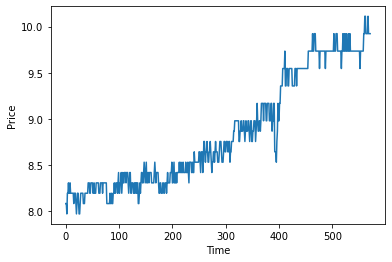

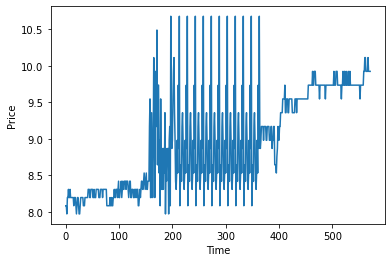

In [75]:
plt.plot(Miller_All_Data)
plt.xlabel('Time')
plt.ylabel('Price')
#plt.axvline(x=20, linewidth=1.5, color='r')
#plt.savefig('noprice_shock_avg.png')
plt.show()

plt.plot(Miller_All_Sim)
plt.xlabel('Time')
plt.ylabel('Price')
#plt.axvline(x=20, linewidth=1.5, color='r')
#plt.savefig('noprice_shock_avg.png')
plt.show()

In [76]:
# Profit

bud_MC=5.640409
coors_MC=6.509169
miller_MC=5.818666
alpha = -0.1312 # price parameter (NL)
rho = 0.6299 # nesting parameter (NL)

def expdelta(price):
    return math.exp((alpha*price)/(1-rho))

def shares(p1, p2, p3):
    return expdelta(p1)/(expdelta(p1)+expdelta(p2)+expdelta(p3))

def profits(p1, p2, p3, mc):
    return (p1-mc)*shares(p1, p2, p3)

In [80]:
Bud_Post_Prof=[]
Coors_Post_Prof=[]
Miller_Post_Prof=[]

Bud_Sim_Prof=[]
Coors_Sim_Prof=[]
Miller_Sim_Prof=[]

Bud_Merge_Prof=[]
Coors_Merge_Prof=[]
Miller_Merge_Prof=[]

for i in range(len(Bud_Prices_Post)):
    x=profits(Bud_Prices_Post[i], Coors_Prices_Post[i], Miller_Prices_Post[i], bud_MC)
    y=profits(Bud_Prices_Time[i], Coors_Prices_Time[i], Miller_Prices_Time[i], bud_MC)
    z=profits(Bud_Prices_Merge[i], Coors_Prices_Merge[i], Miller_Prices_Merge[i], bud_MC)
    Bud_Post_Prof.append(x)
    Bud_Sim_Prof.append(y)
    Bud_Merge_Prof.append(z)
    
for i in range(len(Coors_Prices_Post)):
    x=profits(Coors_Prices_Post[i], Bud_Prices_Post[i], Miller_Prices_Post[i], coors_MC)
    y=profits(Coors_Prices_Time[i], Bud_Prices_Time[i], Miller_Prices_Time[i], coors_MC)
    z=profits(Coors_Prices_Merge[i], Bud_Prices_Merge[i], Miller_Prices_Merge[i], coors_MC)
    Coors_Post_Prof.append(x)
    Coors_Sim_Prof.append(y)
    Coors_Merge_Prof.append(z)
    
for i in range(len(Miller_Prices_Post)):
    x=profits(Miller_Prices_Post[i], Bud_Prices_Post[i], Coors_Prices_Post[i], miller_MC)
    y=profits(Miller_Prices_Time[i], Bud_Prices_Time[i], Coors_Prices_Time[i], miller_MC)
    z=profits(Miller_Prices_Merge[i], Bud_Prices_Merge[i], Coors_Prices_Merge[i], miller_MC)
    Miller_Post_Prof.append(x)
    Miller_Sim_Prof.append(y)
    Miller_Merge_Prof.append(z)


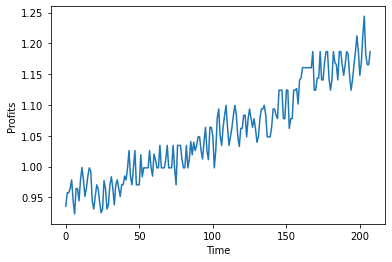

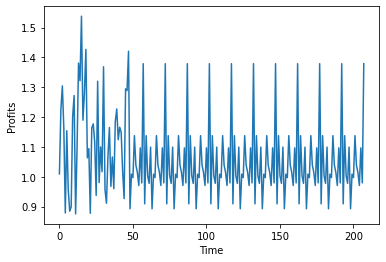

In [79]:
plt.plot(Bud_Post_Prof)
plt.xlabel('Time')
plt.ylabel('Profits')
#plt.axvline(x=20, linewidth=1.5, color='r')
#plt.savefig('noprice_shock_avg.png')
plt.show()

plt.plot(Bud_Sim_Prof)
plt.xlabel('Time')
plt.ylabel('Profits')
#plt.axvline(x=20, linewidth=1.5, color='r')
#plt.savefig('noprice_shock_avg.png')
plt.show()

In [81]:
# Getting profit differences

Bud_Diff_Post_Prof = []
Bud_Diff_Merge_Prof = []

for i in range(len(Bud_Prices_Time)):
    x=round(Bud_Sim_Prof[i]-Bud_Post_Prof[i],6)
    y=round(Bud_Sim_Prof[i]-Bud_Merge_Prof[i],6)
    Bud_Diff_Post_Prof.append(x)
    Bud_Diff_Merge_Prof.append(y)
    
#print(Bud_Diff_Post)
#print(Bud_Diff_Merge)

Avg_Bud_Diff_Prof = np.array(Bud_Diff_Post_Prof)
Avg_Bud_Diff_Prof = np.mean(Avg_Bud_Diff_Prof)
print(Avg_Bud_Diff_Prof)
Avg_Bud_Diff_M_Prof = np.array(Bud_Diff_Merge_Prof)
Avg_Bud_Diff_M_Prof = np.mean(Avg_Bud_Diff_M_Prof)
print(Avg_Bud_Diff_M_Prof)

Coors_Diff_Post_Prof = []
Coors_Diff_Merge_Prof = []

for i in range(len(Coors_Prices_Time)):
    x=round(Coors_Sim_Prof[i]-Coors_Post_Prof[i],6)
    y=round(Coors_Sim_Prof[i]-Coors_Merge_Prof[i],6)
    Coors_Diff_Post_Prof.append(x)
    Coors_Diff_Merge_Prof.append(y)
    
#print(Coors_Diff_Post)
#print(Coors_Diff_Merge)

Avg_Coors_Diff_Prof = np.array(Coors_Diff_Post_Prof)
Avg_Coors_Diff_Prof = np.mean(Avg_Coors_Diff_Prof)
print(Avg_Coors_Diff_Prof)
Avg_Coors_Diff_M_Prof = np.array(Coors_Diff_Merge_Prof)
Avg_Coors_Diff_M_Prof = np.mean(Avg_Coors_Diff_M_Prof)
print(Avg_Coors_Diff_M_Prof)

Miller_Diff_Post_Prof = []
Miller_Diff_Merge_Prof = []

for i in range(len(Miller_Prices_Time)):
    x=round(Miller_Sim_Prof[i]-Miller_Post_Prof[i],6)
    y=round(Miller_Sim_Prof[i]-Miller_Merge_Prof[i],6)
    Miller_Diff_Post_Prof.append(x)
    Miller_Diff_Merge_Prof.append(y)
    
#print(Bud_Diff_Post)
#print(Bud_Diff_Merge)

Avg_Miller_Diff_Prof = np.array(Miller_Diff_Post_Prof)
Avg_Miller_Diff_Prof = np.mean(Avg_Miller_Diff_Prof)
print(Avg_Miller_Diff_Prof)
Avg_Miller_Diff_M_Prof = np.array(Miller_Diff_Merge_Prof)
Avg_Miller_Diff_M_Prof = np.mean(Avg_Miller_Diff_M_Prof)
print(Avg_Miller_Diff_M_Prof)

0.00697801923076923
-0.32086620673076915
0.01726717307692308
-0.32915018269230767
0.026370576923076924
-0.3789748798076923
